    order_rk   party_rk gender_cd  age education_level_cd marital_status_cd  \
0  266071307  761067705         M   40                UGR               DIV   
1  355113920  614049469         F   30                GRD               MAR   
2  347424551  757583701         M   28                UGR               UNM   
3  351562959  541367366         M   24                GRD               UNM   
4  258647149  238473615         M   34                NaN               NaN   

       lvn_state_nm  minute_cost  activation_cost  hold_amount  \
0     ТЮМЕНСКАЯ ОБЛ         4.99             30.0        300.0   
1    РОСТОВСКАЯ ОБЛ         8.49             50.0        300.0   
2  СВЕРДЛОВСКАЯ ОБЛ         5.99             30.0        300.0   
3          Г МОСКВА         8.99             50.0        300.0   
4          Г МОСКВА         6.99             50.0        300.0   

  transport_model  distance_km                created_dttm  \
0              SL     3.690479  2024-08-07 09:47:25.000000   
1   

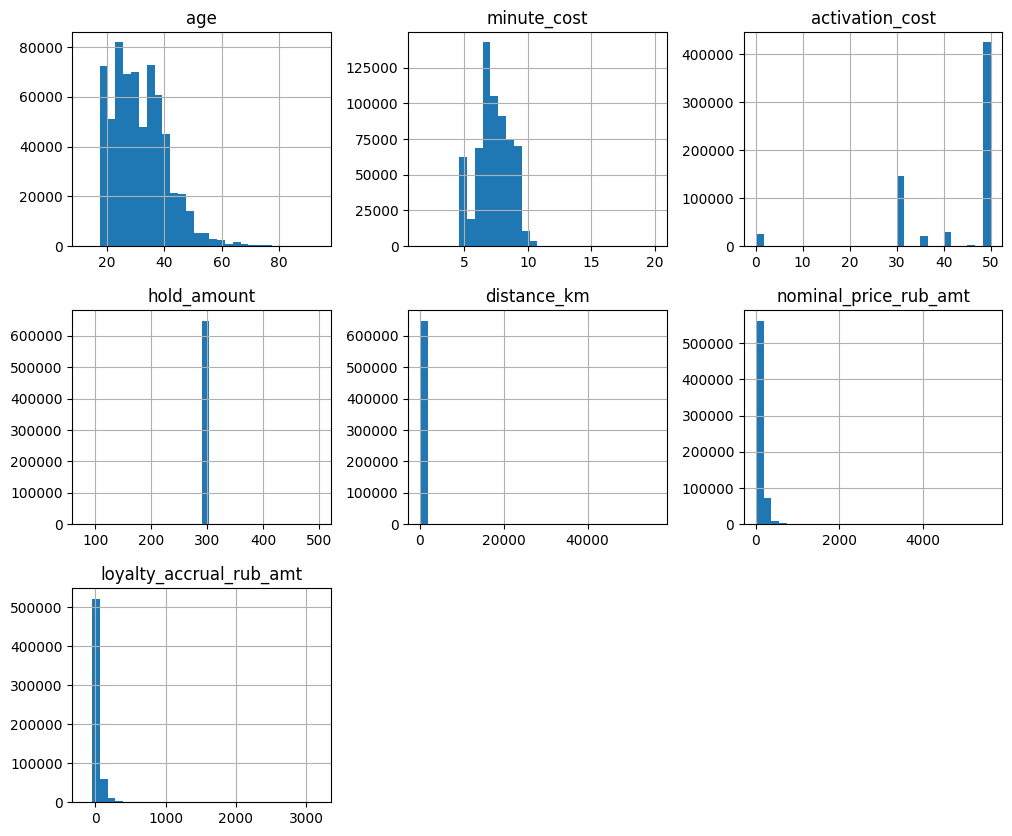

/tmp/ipython-input-413270783.py:32: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-413270783.py:33: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['book_end_dttm']   = pd.to_datetime(df['book_end_dttm'], errors='coerce', infer_datetime_format=True)


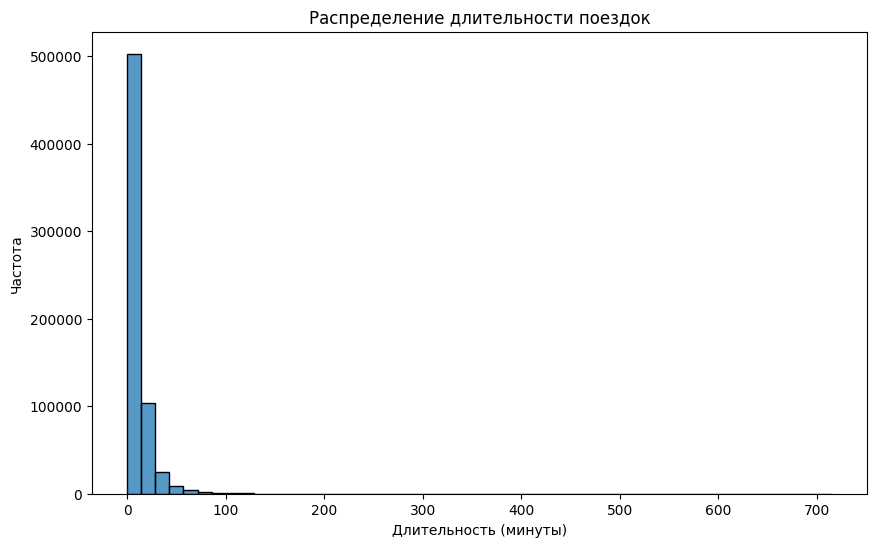

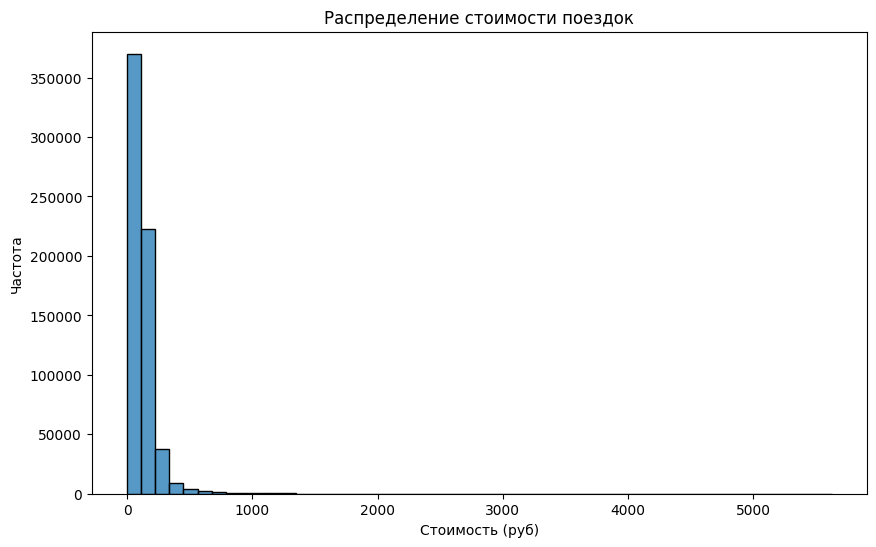

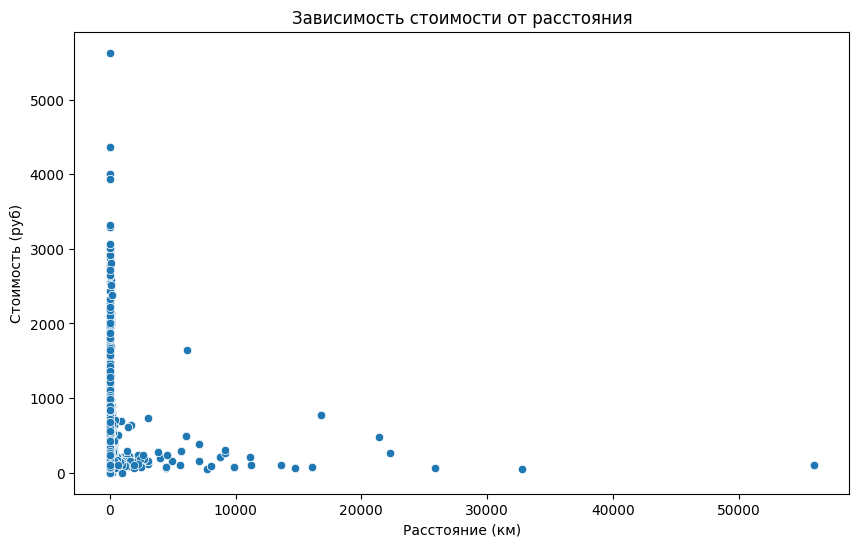

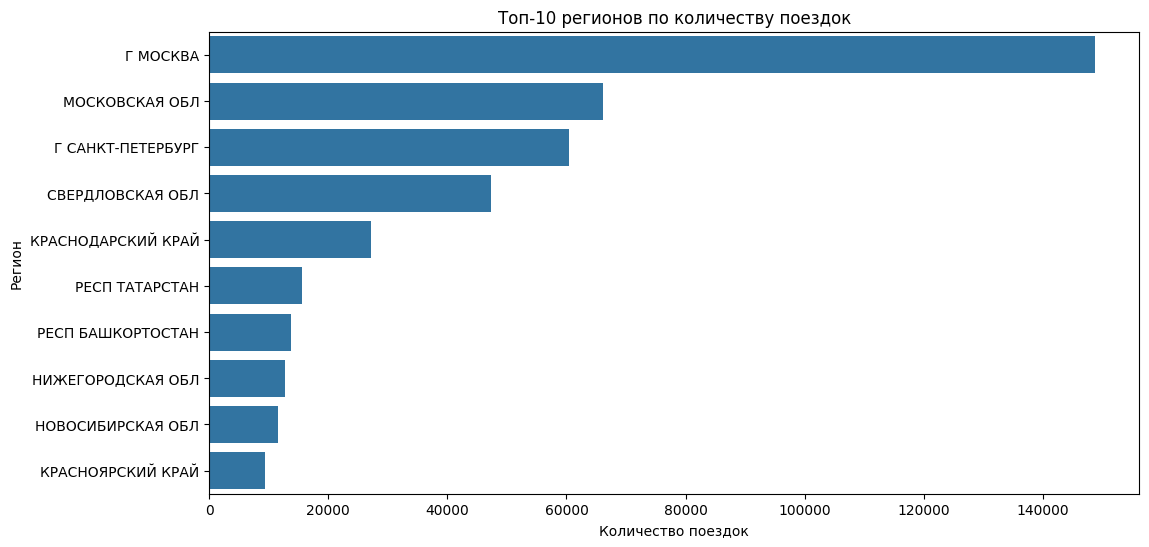

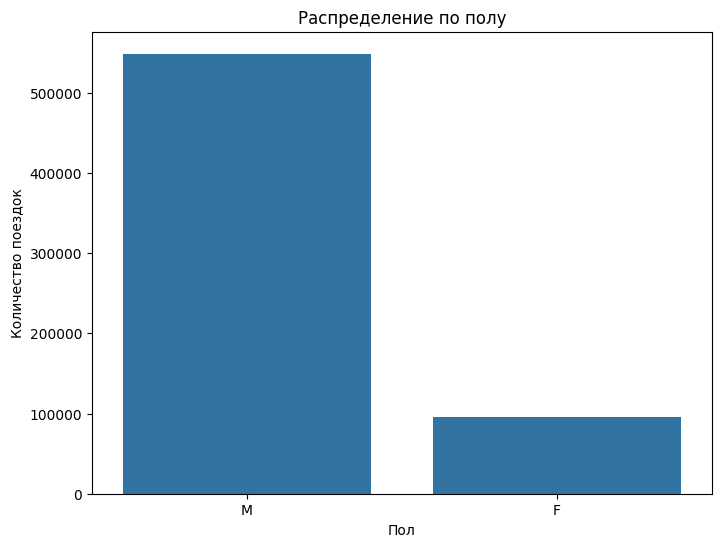

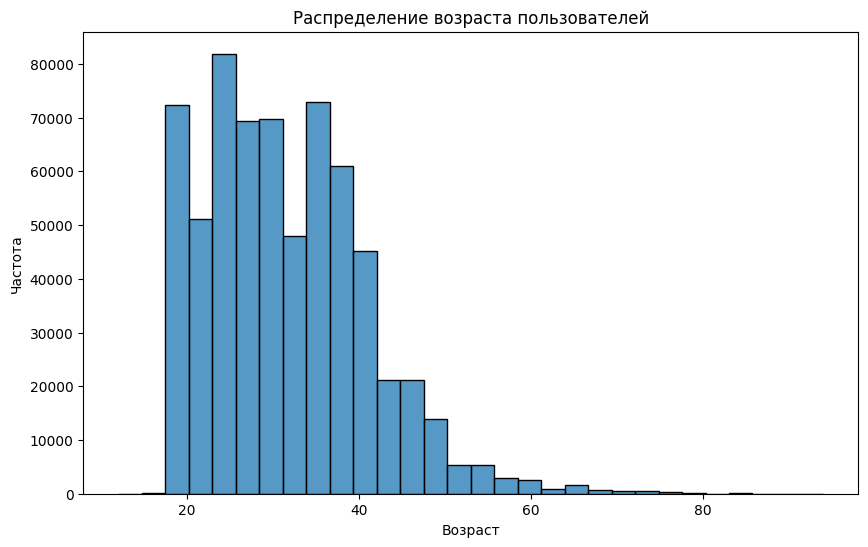

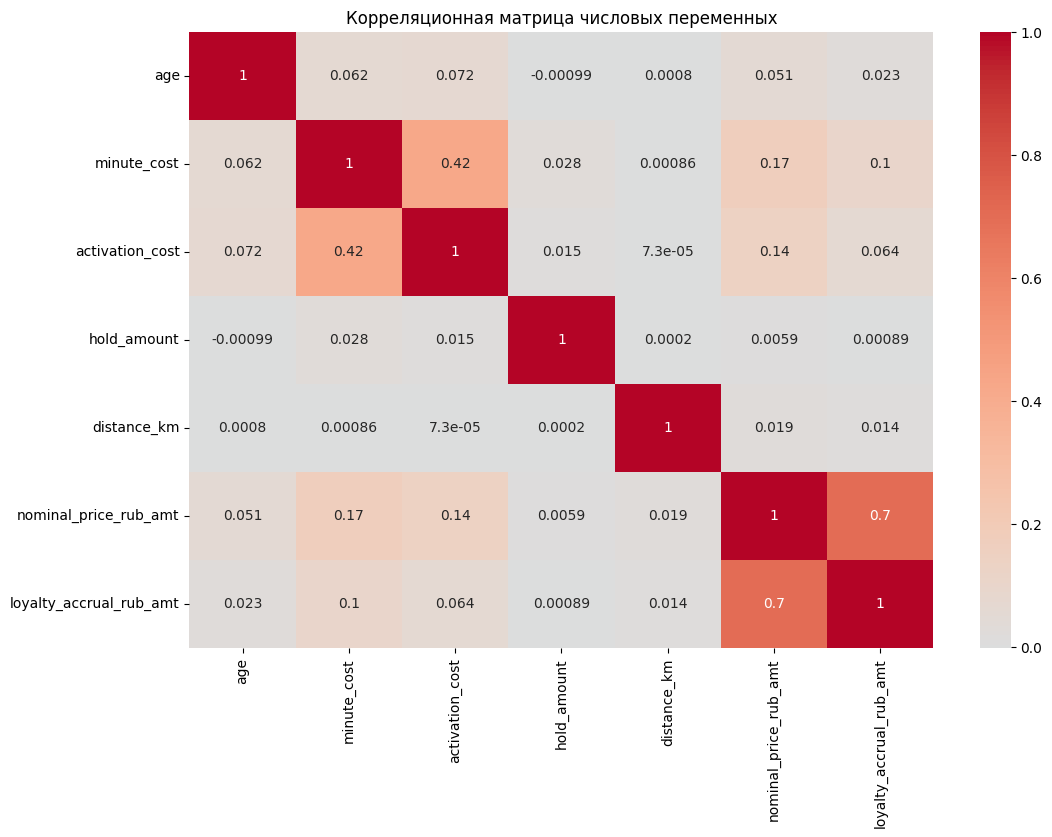

In [11]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Загрузка данных
df = pd.read_csv('kicksharing_clean.csv', low_memory=False)

# Предварительный просмотр
print(df.head())
print(df.info())
print(df.describe())

# Проверка пропущенных значений
print(df.isnull().sum())

# Анализ категориальных переменных
categorical_cols = ['gender_cd', 'education_level_cd', 'marital_status_cd', 'lvn_state_nm', 'transport_model', 'book_time_zone_cd']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Анализ числовых переменных
numeric_cols = ['age', 'minute_cost', 'activation_cost', 'hold_amount', 'distance_km', 'nominal_price_rub_amt', 'loyalty_accrual_rub_amt']
df[numeric_cols].hist(bins=30, figsize=(12, 10))
plt.show()


# Время поездки (устойчивый парсинг дат)
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'], errors='coerce', infer_datetime_format=True)
df['book_end_dttm']   = pd.to_datetime(df['book_end_dttm'], errors='coerce', infer_datetime_format=True)

# Удалим строки, где не удалось распарсить даты
df = df.dropna(subset=['book_start_dttm', 'book_end_dttm'])

# Длительность поездки (в минутах)
df['trip_duration'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60

# Распределение времени поездки
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'].dropna(), bins=50)
plt.title('Распределение длительности поездок')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Частота')
plt.show()

# Стоимость поездки
plt.figure(figsize=(10, 6))
sns.histplot(df['nominal_price_rub_amt'].dropna(), bins=50)
plt.title('Распределение стоимости поездок')
plt.xlabel('Стоимость (руб)')
plt.ylabel('Частота')
plt.show()

# Связь расстояния и стоимости
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_km', y='nominal_price_rub_amt')
plt.title('Зависимость стоимости от расстояния')
plt.xlabel('Расстояние (км)')
plt.ylabel('Стоимость (руб)')
plt.show()

# Анализ по регионам
top_regions = df['lvn_state_nm'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.values, y=top_regions.index)
plt.title('Топ-10 регионов по количеству поездок')
plt.xlabel('Количество поездок')
plt.ylabel('Регион')
plt.show()

# Анализ по полу
gender_counts = df['gender_cd'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество поездок')
plt.show()

# Анализ по возрасту
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), bins=30)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

# Корреляционная матрица
numeric_df = df[numeric_cols].dropna()
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица числовых переменных')
plt.show()

In [9]:
input_file = "kicksharing.csv"
output_file = "kicksharing_clean.csv"

with open(input_file, "rb") as fin, open(output_file, "w", encoding="utf-8") as fout:
    for line in fin:
        try:
            text = line.decode("utf-8")
        except UnicodeDecodeError:
            continue  # если строка битая по кодировке — пропускаем

        if text.count(",") + 1 == 20:  # оставляем только строки с 20 колонками
            fout.write(text)

print("Файл сохранён как", output_file)


Файл сохранён как kicksharing_clean.csv
